# Sampling distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import pareto, uniform, norm, t, ttest_ind, ks_2samp, sem, bootstrap
%matplotlib inline

# PDF

In [2]:
pts = np.linspace(-3, 3, 100)
pts

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

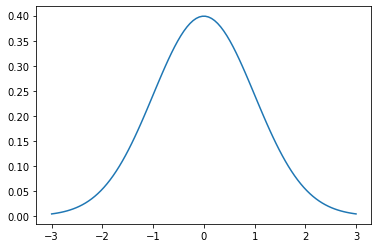

In [3]:
sns.lineplot(pts, norm().pdf(pts))

# CDF

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

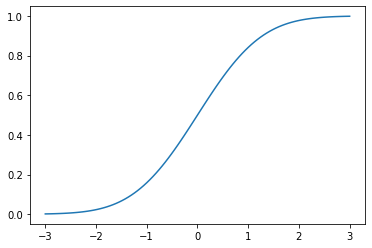

In [4]:
sns.lineplot(pts, norm().cdf(pts))

(4.980478091348804, 5.019673041254611)

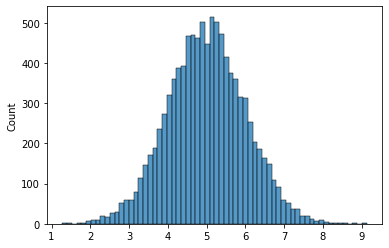

In [5]:
sample_pts = norm(5, 1).rvs(size=10000)
sample_error = sem(sample_pts)
confidence_interval = norm.interval(0.95, loc=sample_pts.mean(), scale=sample_error)
sns.histplot(sample_pts)
confidence_interval


In [6]:
z_table_lookup = norm.ppf((1 + .95) / 2)
z_table_lookup

1.959963984540054

In [7]:
sample_error = sem(sample_pts)
mean = sample_pts.mean()
(mean - z_table_lookup * sample_error, mean + z_table_lookup * sample_error)

(4.980478091348804, 5.019673041254611)

## Bootstrap sampling

In [8]:
bootstrap((sample_pts,), np.mean, confidence_level=0.95, n_resamples=100, method='percentile' )

BootstrapResult(confidence_interval=ConfidenceInterval(low=4.984798649270064, high=5.02023864866845), standard_error=0.009216454714027376)

### The hard way

In [9]:
import random
sample_pts_list = sample_pts.tolist()

n_bootstraps = 1000
# sample without replace
bootstrap_means = [np.mean(random.choices(sample_pts_list, k=len(sample_pts_list))) for _ in range(n_bootstraps)]
bootstrap_means = sorted(bootstrap_means)
np.percentile(bootstrap_means, 2.5), np.percentile(bootstrap_means, 97.5)

(4.980908457507922, 5.019731496550781)

# Sampling normal with uniform

In [10]:
uniform_pts = uniform(-3, 6).rvs(200)

In [11]:
uniform_pts

array([-2.37177776,  1.9333499 , -1.24792481,  0.71425517,  2.42068626,
        1.21057154,  1.40491386,  1.56498317,  2.17941212,  0.48602803,
       -0.2253349 ,  0.05710223,  1.94788702, -0.92527623, -1.78847311,
        2.58256606,  0.57489892,  0.93394415,  1.78068932, -2.8777064 ,
       -0.63336657, -1.44241405,  0.2643627 , -0.47654928,  1.86652359,
       -0.45103081, -2.13923536,  0.85038115,  1.25796383, -2.86832694,
       -1.12567547,  0.48404356,  1.91974152,  0.65247558,  0.96661976,
        0.12529086, -2.4318524 ,  0.16637073, -0.78805416,  2.84530082,
       -1.7936647 , -1.93575969, -1.54023513,  1.60488683,  1.83196105,
       -2.26762691, -1.61737216,  2.22186917, -1.03301742,  0.32359519,
        1.92201933, -1.00850646, -2.17982641,  1.82229922, -0.08669222,
        1.47638475,  2.59551688,  0.31265619,  2.39802659, -0.99936548,
       -2.8465241 ,  1.45190438,  0.55280444,  2.37127511, -1.38798325,
        0.72859453,  1.6286204 ,  0.9354479 ,  0.44491378, -1.86

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

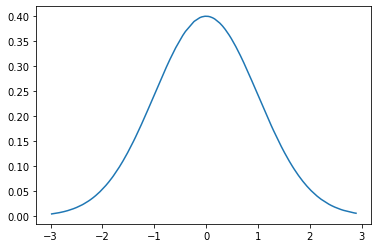

In [12]:
sns.lineplot(uniform_pts, norm().pdf(uniform_pts))

### Aside proving the Central Limit Theorem

In [13]:
sample_size = 1000
num_samples = 100
lots_of_uniform_samples = uniform(-40, 80).rvs((num_samples, sample_size))

In [14]:
lots_of_uniform_samples

array([[ 30.89870428,  -0.18278887,  20.48848762, ...,   4.03064812,
         22.85290265,   3.22281651],
       [ 39.96704122, -18.67154278, -12.17373889, ..., -22.05173599,
         -7.42955319, -36.11171592],
       [  8.74739608,   8.02560025, -13.00831177, ...,   6.62113374,
         38.71547883, -39.98189654],
       ...,
       [-23.82391737,  23.30707843, -39.04440052, ...,  28.13076083,
        -11.54604672,  33.53009474],
       [-24.4285733 ,  26.30647486, -36.53222389, ...,  15.61734211,
        -22.68040364,  24.9544957 ],
       [-33.60038407, -14.91560822, -39.52513582, ...,  -3.5752597 ,
        -12.38435595,  20.76576657]])

In [15]:
means_samples = lots_of_uniform_samples.mean(axis=0)
means_samples

array([-1.37482176e+00, -4.80071753e+00,  1.24217627e-01, -3.53317815e+00,
        4.95958919e+00, -7.82566773e-01, -3.48772873e+00, -5.86918837e+00,
       -4.42382203e-02, -3.48761930e+00, -2.76960730e-01,  1.01792432e+00,
       -2.93216448e-01,  3.44019872e+00,  5.26168841e+00,  3.16693283e+00,
       -1.78216893e+00,  2.24866120e+00,  2.60144273e+00, -5.05136503e-01,
       -1.03622025e+00,  2.48274143e+00,  2.69807190e-01, -2.64865206e+00,
       -1.65702914e+00,  1.64054140e+00, -6.61523428e-01, -7.50339400e-01,
        2.35246692e+00,  3.41357163e+00, -3.83367908e+00, -1.94702241e+00,
        2.13392490e+00,  8.89612281e-01, -2.67221302e+00, -1.41447418e-01,
       -5.66759311e-01, -3.97864789e+00,  2.87211566e+00,  1.93007591e+00,
        1.91305278e+00,  7.10526467e-01, -3.50571529e+00,  6.36514284e-01,
       -1.18595437e+00,  1.08182109e+00,  5.26947599e-01, -5.55268768e-01,
       -3.56640707e+00, -2.09003957e+00,  1.33690093e-02,  2.62667312e+00,
       -1.65305906e-01, -

<AxesSubplot:title={'center':'Means of 100 sample(s)'}, ylabel='Count'>

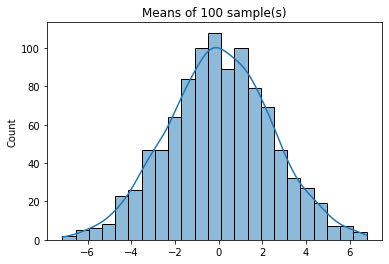

In [16]:
g = sns.histplot(means_samples, kde=True)
g.set_title(f'Means of {num_samples} sample(s)')
g

# Sampling Pareto distribution with normal

In [17]:
normal_pts = norm(2, 1).rvs(100)
normal_pts

array([ 2.08238749,  1.44215789,  1.58789324,  0.88287069,  1.1070549 ,
        2.66001784,  0.2157659 ,  2.81104328,  1.50465545,  2.22034352,
        0.70723969,  2.13778667,  4.6873774 ,  2.9951808 ,  0.81823712,
        3.20506163,  1.39528338,  3.0516491 ,  2.00487493,  3.06900366,
        3.99568361,  2.93978569,  1.10750636,  1.05035916,  2.68070037,
        2.33649086,  1.58384843,  2.75655018,  2.04011947,  1.50534706,
        2.49305617,  1.72207185,  2.22041055,  2.89208875,  1.06714387,
        2.30183147,  2.1329266 ,  2.32910592,  0.70608729,  0.56145814,
        3.49291467,  0.62801741,  4.03349296,  2.14844992,  1.99177619,
        2.55858366,  3.52117814,  2.29490244,  2.13276196,  2.0219087 ,
        0.72141122,  0.18817562, -0.51215479,  1.25765371,  3.59641578,
        1.11014454,  3.32816203,  2.1679463 ,  2.62250027,  1.19749225,
        1.59714962,  0.79905148,  5.16330716,  1.51214247,  2.13455089,
        2.59938662,  0.9364475 ,  3.91429318,  2.41229265,  3.48

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

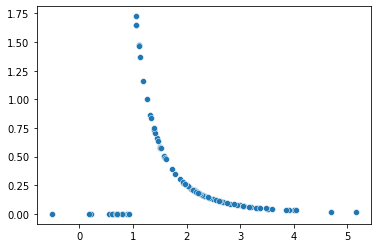

In [18]:
sns.scatterplot(normal_pts, pareto(2).pdf(normal_pts))

# Sampling 2 dimensions

In [19]:
angles = uniform(0, 2 * np.pi).rvs(1000)
angles

array([3.93289987, 1.77078178, 0.13293124, 0.44341831, 5.39687764,
       2.35198271, 3.47302552, 5.00342191, 1.16037198, 4.9210833 ,
       5.95382926, 4.14029779, 3.67152557, 6.22101873, 2.69509394,
       2.23328753, 1.3811522 , 5.62119369, 4.27503189, 1.81387624,
       5.32282531, 5.75197966, 1.09596281, 5.15238711, 6.03509034,
       1.84473249, 0.94703208, 3.36100937, 1.84654652, 3.59909466,
       0.40533393, 0.62106741, 1.00112494, 3.01965703, 1.49245676,
       2.90334378, 1.59659638, 4.30463938, 2.31713828, 3.97871767,
       4.60342366, 5.60725837, 3.52048085, 2.00194062, 5.85703954,
       1.5178741 , 4.42178759, 5.66872807, 6.1878092 , 5.10395415,
       2.57189957, 6.17603622, 3.69032643, 2.61860313, 4.65891059,
       2.27259725, 4.28230682, 3.96343508, 0.43924946, 5.63146174,
       1.93499674, 1.47555344, 0.47670559, 4.600817  , 3.66976831,
       6.25699392, 1.20435252, 4.85762431, 2.9456275 , 1.411156  ,
       4.38697889, 5.00765384, 2.73567673, 1.24855488, 5.26187

In [20]:
radii = uniform().rvs(1000)
radii

array([6.53801031e-03, 4.16735210e-01, 3.91724598e-03, 1.14079252e-01,
       5.65570491e-01, 2.61833272e-01, 1.69348771e-01, 1.94708023e-01,
       1.99855406e-01, 4.80969819e-01, 1.83033119e-01, 4.48337383e-01,
       9.14601988e-01, 4.30298979e-01, 1.07263614e-01, 3.40176332e-01,
       7.76970362e-01, 9.80937952e-01, 6.38358051e-01, 5.36475609e-01,
       7.86411814e-01, 6.55758313e-01, 2.83110362e-01, 5.31489185e-01,
       9.74583522e-01, 5.79534144e-02, 4.71059188e-01, 1.44220647e-01,
       1.52269638e-01, 9.98199325e-01, 4.03235948e-01, 9.92628187e-01,
       7.65957654e-01, 5.58225210e-01, 8.81165823e-01, 8.75409791e-02,
       6.46610349e-01, 4.88653623e-01, 4.32081867e-01, 6.92535461e-01,
       2.84860808e-01, 2.98053213e-01, 5.25948153e-01, 3.40398136e-01,
       1.33951078e-01, 1.78486393e-01, 9.75325111e-01, 3.80886276e-01,
       2.70979394e-01, 3.99217350e-01, 7.48450393e-01, 3.19164687e-01,
       4.26550771e-01, 8.41724955e-01, 4.10918286e-01, 6.95800153e-01,
      

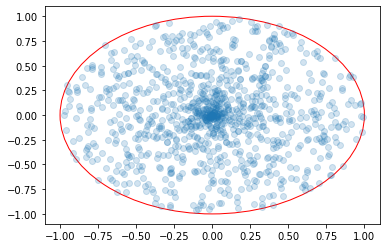

In [21]:
fig, ax = plt.subplots()
ax.plot(radii * np.cos(angles), radii * np.sin(angles), 'o', alpha=0.2)
ax.add_patch(plt.Circle((0, 0), 1, color='r', fill=False))

# Monte Carlo Sampling

In [22]:
samples = pd.DataFrame(uniform(-1, 2).rvs((1000, 2)), columns=['x', 'y'])
samples

,x,y
0,-0.797510,0.930718
1,-0.183558,-0.293719
2,0.063982,-0.732173
3,0.097926,-0.866366
4,0.157716,0.012108
...,...,...
995,-0.977560,-0.220029
996,0.081560,0.740030
997,-0.312656,0.787857
998,-0.044337,0.393954


In [23]:
samples['within'] = samples.apply(lambda row: np.sqrt(row[0] ** 2 + row[1] ** 2) <= 1.0, axis=1)
samples

,x,y,within
0,-0.797510,0.930718,False
1,-0.183558,-0.293719,True
2,0.063982,-0.732173,True
3,0.097926,-0.866366,True
4,0.157716,0.012108,True
...,...,...,...
995,-0.977560,-0.220029,False
996,0.081560,0.740030,True
997,-0.312656,0.787857,True
998,-0.044337,0.393954,True


In [24]:
within_samples = samples[samples['within']]
outside_samples = samples[~samples['within']]

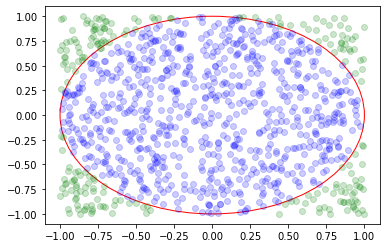

In [25]:
fig, ax = plt.subplots()
ax.plot(within_samples['x'], within_samples['y'], 'o', color='b', alpha=0.2)
ax.plot(outside_samples['x'], outside_samples['y'], 'o', color='g', alpha=0.2)
ax.add_patch(plt.Circle((0, 0), 1, color='r', fill=False))

# T-test

$$t = \frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{\sigma_{1}^{2}}{n_1} + \frac{\sigma_{2}^{2}}{n_2}}}$$

# Playing with values

t-value:  24.56265830389922
Alpha 5.517008259430968e-133
Accept alternative:  True


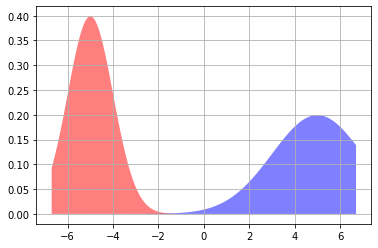

In [26]:
mean = 0
diff = 5
std_diff = 1
std = 1

x = np.linspace(norm.ppf(0.00000000001), norm.ppf(0.99999999999), 100000)

mu_1 = mean - diff
mu_2 = mean + diff

std_1 = std
std_2 = std + std_diff
y1 = norm.pdf(x, mu_1, std_1)
y2 = norm.pdf(x, mu_2, std_2)
plt.fill_between(x, y1, facecolor='red', interpolate= True, linewidth=0, alpha=0.5)
plt.fill_between(x, y2,facecolor='blue', interpolate= True, linewidth=0, alpha=0.5)


plt.grid()

t_value, alpha = ttest_ind(y1, y2, equal_var=False)
    
print("t-value: ", t_value)
print("Alpha", alpha)
print("Accept alternative: ", alpha <= 0.05)

KS stat 0.39
Alpha 3.5690338557186834e-07
Accept alternative:  True
KS Test max difference:  39


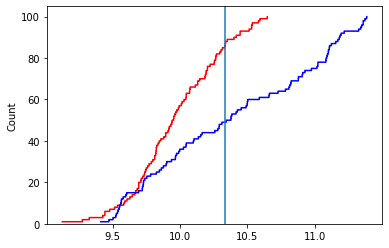

In [27]:
mu = 10
sigma = 0.3 
N = 100

np.random.seed(3)
s = np.random.normal(mu, sigma, N)
#np.random.seed(31)
#s2 = np.random.normal(mu, sigma, N)
s2 = np.random.uniform(9.41, 11.43, 100)

nbins = 10000
min_range = min([s.min(), s2.min()])
max_range = max([s.max(), s2.max()])

hist1, bin_edges1 = np.histogram(s, nbins, range=(min_range, max_range))
hist2, bin_edges2 = np.histogram(s2, nbins, range=(min_range, max_range))
cdf_hist1 = np.cumsum(hist1)
cdf_hist2 = np.cumsum(hist2)

diff = np.abs(cdf_hist1 - cdf_hist2)
max_diff = max(diff)
argmax_diff = np.argmax(diff)


g1 = sns.histplot(s, bins=nbins, cumulative=True, element='step', color='red', fill=False)
g2 = sns.histplot(s2, bins=nbins, cumulative=True, element='step', color='blue', fill=False)

g1.axes.axvline(bin_edges1[argmax_diff])
ks_stat, alpha = ks_2samp(s, s2)
print("KS stat", ks_stat)
print("Alpha", alpha)
print("Accept alternative: ", alpha <= 0.05)

print("KS Test max difference: ", max_diff)

# Permutation testing

In [28]:
s = s.tolist()
s2 = s2.tolist()

avg_s = np.mean(s)
avg_s2 = np.mean(s2)
combined = s + s2

n_permuations = int(1e4)
permutations = []
for i in range(n_permuations):
    new_combined = random.shuffle(combined)
    new_s_mean = np.mean(combined[:len(s)])
    new_s2_mean = np.mean(combined[len(s):])
    permutations.append(new_s_mean - new_s2_mean)

<AxesSubplot:ylabel='Count'>

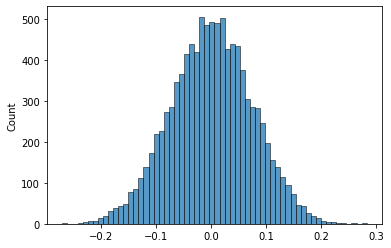

In [29]:
sns.histplot(permutations)

In [30]:
avg_s - avg_s2

-0.41649995470750945

In [31]:
permutations[:10]

[0.02189238423177997,
 0.18732618138543344,
 -0.055431112313822695,
 -0.002224018753524959,
 -0.01224599922897518,
 0.03950534061288735,
 -0.11061082259113064,
 0.072107474871137,
 -0.054861317385638486,
 0.027282207509580658]

In [32]:
gt_avg = len([i for i in permutations if i > avg_s - avg_s2])
gt_avg

10000

In [33]:
p_value = gt_avg / len(permutations)
p_value if p_value < 0.5 else 1 - p_value

0.0

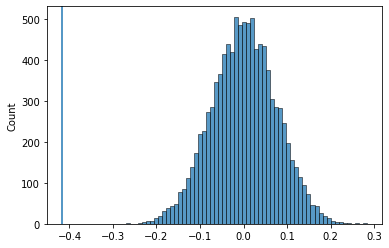

In [34]:
g = sns.histplot(permutations)
g.axes.axvline(avg_s - avg_s2)